# Bonus Soru

In [6]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_excel("C:\\Users\\zinci\\Downloads\\hackathon 2024 - Yapay Zeka.xlsx")
df.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701


In [8]:
# Zaman damgasını datetime formatına çevirme
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

# Saat dilimlerini ekleme
df['HOUR'] = df['TIME_STAMP'].dt.hour

df.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,HOUR
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,18
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575,18
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144,18
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673,18
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701,18


In [9]:
# Eksik değerleri medyan ile doldurma
df[['DOWNLOAD', 'UPLOAD']] = df[['DOWNLOAD', 'UPLOAD']].fillna(df[['DOWNLOAD', 'UPLOAD']].median())


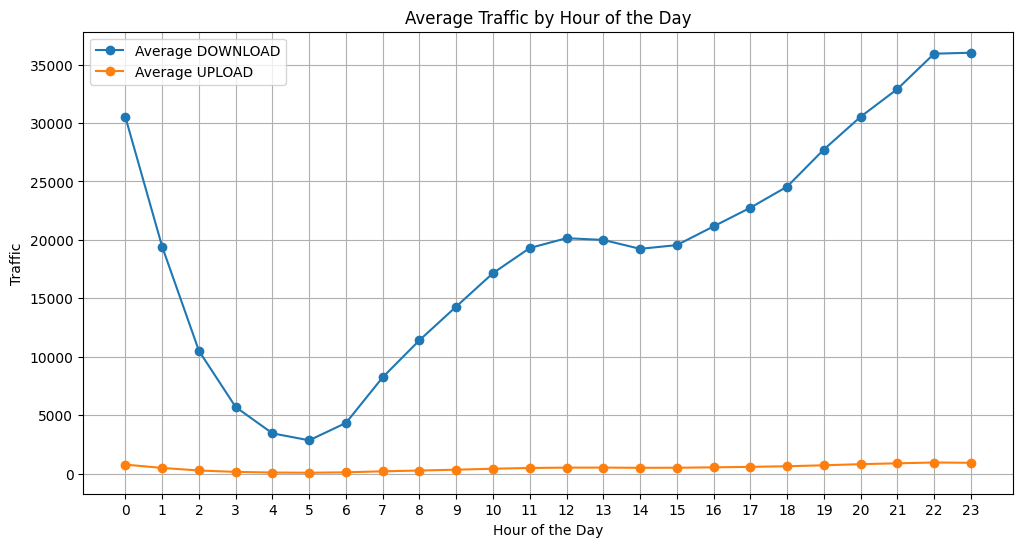

In [11]:
# Saat dilimlerine göre ortalama DOWNLOAD ve UPLOAD değerlerini hesaplama
hourly_traffic = df.groupby('HOUR').agg({'DOWNLOAD': 'mean', 'UPLOAD': 'mean'}).reset_index()

# Trafiğin yoğun olduğu saat dilimlerini görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(hourly_traffic['HOUR'], hourly_traffic['DOWNLOAD'], label='Average DOWNLOAD', marker='o')
plt.plot(hourly_traffic['HOUR'], hourly_traffic['UPLOAD'], label='Average UPLOAD', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic')
plt.title('Average Traffic by Hour of the Day')
plt.legend()
plt.grid(True)
plt.xticks(hourly_traffic['HOUR'])
plt.show()

In [12]:
# Trafiğin en yoğun olduğu saat dilimlerini belirleme
top_download_hours = hourly_traffic.sort_values(by='DOWNLOAD', ascending=False).head()
top_upload_hours = hourly_traffic.sort_values(by='UPLOAD', ascending=False).head()

print('Top 5 Hours with Highest DOWNLOAD Traffic:')
print(top_download_hours)

print('Top 5 Hours with Highest UPLOAD Traffic:')
print(top_upload_hours)


Top 5 Hours with Highest DOWNLOAD Traffic:
    HOUR      DOWNLOAD      UPLOAD
23    23  36021.987919  921.975905
22    22  35938.868070  944.783802
21    21  32913.354761  878.126808
20    20  30539.754791  802.411190
0      0  30503.295930  766.178764
Top 5 Hours with Highest UPLOAD Traffic:
    HOUR      DOWNLOAD      UPLOAD
22    22  35938.868070  944.783802
23    23  36021.987919  921.975905
21    21  32913.354761  878.126808
20    20  30539.754791  802.411190
0      0  30503.295930  766.178764


Text(0, 0.5, 'Ortalama UPLOAD')

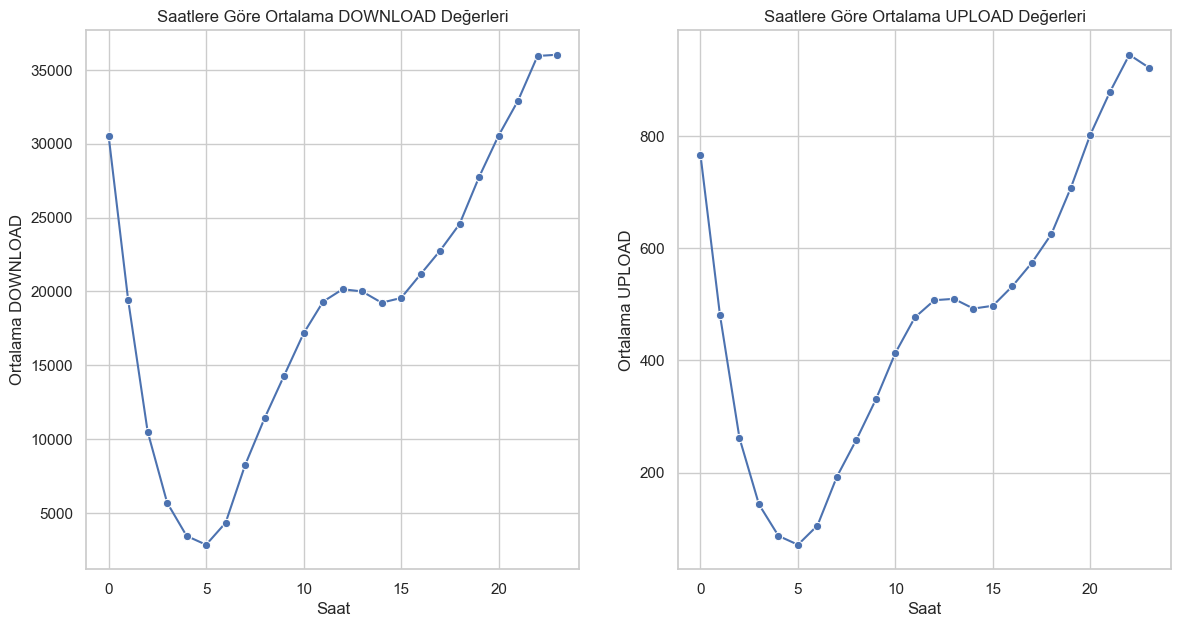

In [13]:
# Grafikler için stil ayarları
sns.set(style='whitegrid')

# Saatlere göre DOWNLOAD ve UPLOAD ortalamalarını hesaplayalım
hourly_data = df.groupby('HOUR').agg({'DOWNLOAD': 'mean', 'UPLOAD': 'mean'}).reset_index()

# Saatlere göre DOWNLOAD ve UPLOAD grafiklerini çizelim
plt.figure(figsize=(14, 7))

# DOWNLOAD grafiği
plt.subplot(1, 2, 1)
sns.lineplot(x='HOUR', y='DOWNLOAD', data=hourly_data, marker='o')
plt.title('Saatlere Göre Ortalama DOWNLOAD Değerleri')
plt.xlabel('Saat')
plt.ylabel('Ortalama DOWNLOAD')

# UPLOAD grafiği
plt.subplot(1, 2, 2)
sns.lineplot(x='HOUR', y='UPLOAD', data=hourly_data, marker='o')
plt.title('Saatlere Göre Ortalama UPLOAD Değerleri')
plt.xlabel('Saat')
plt.ylabel('Ortalama UPLOAD')